In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
# reading file
df = pd.read_csv('nike_shoes_sales.csv')
df.head()

,product_name,product_id,listing_price,sale_price,discount,brand,description,rating,reviews,images
0,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
1,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,The legend lives on in the Nike Air Force 1 '0...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
2,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,"Taking both height and craft to new levels, th...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
3,Nike Air Max Dia SE,CD0479-200,0,9995,0,Nike,"Designed for a woman's foot, the Nike Air Max ...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
4,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,Pass on the good vibes in the Nike Air Max Ver...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."


In [3]:
# Some product don't have listing price, rating or review
# text analysis available
# images available throuhg a url / contains empty records
df.info

<bound method DataFrame.info of                              product_name  product_id  listing_price  \
0          Nike Air Force 1 '07 Essential  CJ1646-600              0   
1                    Nike Air Force 1 '07  CT4328-101              0   
2            Nike Air Force 1 Sage Low LX  CI3482-200              0   
3                     Nike Air Max Dia SE  CD0479-200              0   
4                     Nike Air Max Verona  CZ6156-101              0   
..                                    ...         ...            ...   
638                    Air Jordan 8 Retro  CI1236-100          15995   
639            Nike Phantom Venom Club IC  AO0578-717           4995   
640  Nike Mercurial Superfly 7 Academy TF  AT7978-414           8495   
641                       Nike Air Max 98  AH6799-300              0   
642                        Nike P-6000 SE  CJ9585-600           8995   

     sale_price  discount brand  \
0          7495         0  Nike   
1          7495         0  Nike  

In [4]:
# discount column looks empty
# ratings are categories from 0 - 5 
# reviews is a count of the review of each shoe
# listing and sale price are encoded, looks like the correct sales price is 2 decimals to the left
df.describe()

,listing_price,sale_price,discount,rating,reviews
count,643.000000,643.000000,643.0,643.000000,643.000000
mean,3875.762053,10213.676516,0.0,2.734837,7.181960
std,5889.947172,4513.289512,0.0,2.137756,15.968315
min,0.000000,1595.000000,0.0,0.000000,0.000000
25%,0.000000,6995.000000,0.0,0.000000,0.000000
50%,0.000000,9597.000000,0.0,3.800000,1.000000
75%,8495.000000,12797.000000,0.0,4.600000,6.000000
max,19995.000000,36500.000000,0.0,5.000000,223.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_name   643 non-null    object 
 1   product_id     643 non-null    object 
 2   listing_price  643 non-null    int64  
 3   sale_price     643 non-null    int64  
 4   discount       643 non-null    int64  
 5   brand          643 non-null    object 
 6   description    640 non-null    object 
 7   rating         643 non-null    float64
 8   reviews        643 non-null    int64  
 9   images         572 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 50.4+ KB


In [6]:
df.shape

(643, 10)

In [7]:
# names and id's are repeated
df.nunique()

product_name     393
product_id       554
listing_price     26
sale_price        91
discount           1
brand              1
description      510
rating            32
reviews           53
images           498
dtype: int64

In [8]:
# suming all different 
df.isnull().sum()

product_name      0
product_id        0
listing_price     0
sale_price        0
discount          0
brand             0
description       3
rating            0
reviews           0
images           71
dtype: int64

In [9]:
# nulls average by columns
(df.isnull().sum()/(len(df)))*100

product_name      0.000000
product_id        0.000000
listing_price     0.000000
sale_price        0.000000
discount          0.000000
brand             0.000000
description       0.466563
rating            0.000000
reviews           0.000000
images           11.041991
dtype: float64

In [10]:
# basic transformations
def basic_transformations():
    # moving decimals to the left
    df['listing_price_x10'] = df['listing_price']/100
    df['sale_price_X10'] = df['sale_price']/100
    # adding means to 0 values
    df['listing_price_x10'].replace(to_replace = 0, value = '38.76', inplace=True)
    df['sale_price_X10'].replace(to_replace = 0, value = '102.13', inplace=True)
    # casting data types
    df['listing_price_x10'] = pd.to_numeric(df['listing_price_x10'])
    df['sale_price_X10'] = pd.to_numeric(df['sale_price_X10'])

    return df.head()

In [11]:
basic_transformations()

,product_name,product_id,listing_price,sale_price,discount,brand,description,rating,reviews,images,listing_price_x10,sale_price_X10
0,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",38.76,74.95
1,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,The legend lives on in the Nike Air Force 1 '0...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",38.76,74.95
2,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,"Taking both height and craft to new levels, th...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",38.76,99.95
3,Nike Air Max Dia SE,CD0479-200,0,9995,0,Nike,"Designed for a woman's foot, the Nike Air Max ...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",38.76,99.95
4,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,Pass on the good vibes in the Nike Air Max Ver...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",38.76,99.95


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_name       643 non-null    object 
 1   product_id         643 non-null    object 
 2   listing_price      643 non-null    int64  
 3   sale_price         643 non-null    int64  
 4   discount           643 non-null    int64  
 5   brand              643 non-null    object 
 6   description        640 non-null    object 
 7   rating             643 non-null    float64
 8   reviews            643 non-null    int64  
 9   images             572 non-null    object 
 10  listing_price_x10  643 non-null    float64
 11  sale_price_X10     643 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 60.4+ KB


In [13]:
df.describe()

,listing_price,sale_price,discount,rating,reviews,listing_price_x10,sale_price_X10
count,643.000000,643.000000,643.0,643.000000,643.000000,643.000000,643.000000
mean,3875.762053,10213.676516,0.0,2.734837,7.181960,64.436874,102.136765
std,5889.947172,4513.289512,0.0,2.137756,15.968315,42.566897,45.132895
min,0.000000,1595.000000,0.0,0.000000,0.000000,29.950000,15.950000
25%,0.000000,6995.000000,0.0,0.000000,0.000000,38.760000,69.950000
50%,0.000000,9597.000000,0.0,3.800000,1.000000,38.760000,95.970000
75%,8495.000000,12797.000000,0.0,4.600000,6.000000,84.950000,127.970000
max,19995.000000,36500.000000,0.0,5.000000,223.000000,199.950000,365.000000


In [14]:
print(df[['product_name', 'product_id']])

                             product_name  product_id
0          Nike Air Force 1 '07 Essential  CJ1646-600
1                    Nike Air Force 1 '07  CT4328-101
2            Nike Air Force 1 Sage Low LX  CI3482-200
3                     Nike Air Max Dia SE  CD0479-200
4                     Nike Air Max Verona  CZ6156-101
..                                    ...         ...
638                    Air Jordan 8 Retro  CI1236-100
639            Nike Phantom Venom Club IC  AO0578-717
640  Nike Mercurial Superfly 7 Academy TF  AT7978-414
641                       Nike Air Max 98  AH6799-300
642                        Nike P-6000 SE  CJ9585-600

[643 rows x 2 columns]


In [15]:
# this regex extracts all brands
for i in df['product_name']:
    print(re.findall(r'^Nike\s.......|^Nike\s......^Nike\s.....|^Nike\s....|^Nike\s...|^NikeCourt|^Air Jordan|^LeBron|^PG|^Jordan|^Air\s...|^Zoom|^Kyrie|^KD', i))

['Nike Air For']
['Nike Air For']
['Nike Air For']
['Nike Air Max']
['Nike Air Max']
['Nike Free Me']
['NikeCourt']
['Nike Free Me']
['Nike Zoom Pe']
['Nike Air Max']
['Nike Air Max']
['Nike Air For']
['Jordan']
['Nike SuperRe']
['Nike Air Vap']
['Nike Air Zoo']
['Nike Air Max']
['Nike Air Max']
['Nike Air For']
['Nike Court V']
['Nike Air Max']
['Nike SB Brui']
['Air Jordan']
['Nike Metcon ']
['Nike React P']
['Nike Joyride']
['Nike Air Max']
['Nike Air Vap']
['Nike Offcour']
['Nike React P']
['Jordan']
['LeBron']
['Nike In-Seas']
['Nike Joyride']
['Nike ZoomX V']
['Nike Air For']
['Nike Air For']
['Nike Air Max']
['Nike Air Max']
['Air Jordan']
['Nike Daybrea']
['Nike SB Shan']
['Nike Mercuri']
['Air Jordan']
['Nike Air Max']
['Nike Air Max']
['Nike Joyride']
['Nike Free RN']
['Nike Mercuri']
['Nike Mercuri']
['PG']
['Air Max']
['Nike Air Max']
['Jordan']
['Nike Air Zoo']
['Nike Metcon ']
['Nike Air Max']
['Nike Mercuri']
['Nike Air Max']
['Nike Air Max']
['LeBron']
['Nike Mercuri']


In [16]:
# extracting all brands with a regular expression
def brand_extract(product):
    return re.findall(r'^Nike\s...|^NikeCourt|^Air Jordan|^LeBron|^PG|^Jordan|^Air\s...|^Zoom|^Kyrie|^KD', product)

In [17]:
# applying and storing function
df['product_brand'] = df['product_name'].apply(brand_extract)
df['product_brand'] = df['product_brand'].str[0]

In [18]:
df

,product_name,product_id,listing_price,sale_price,discount,brand,description,rating,reviews,images,listing_price_x10,sale_price_X10,product_brand
0,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",38.76,74.95,Nike Air
1,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,The legend lives on in the Nike Air Force 1 '0...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",38.76,74.95,Nike Air
2,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,"Taking both height and craft to new levels, th...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",38.76,99.95,Nike Air
3,Nike Air Max Dia SE,CD0479-200,0,9995,0,Nike,"Designed for a woman's foot, the Nike Air Max ...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",38.76,99.95,Nike Air
4,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,Pass on the good vibes in the Nike Air Max Ver...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",38.76,99.95,Nike Air
...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_...",159.95,127.97,Air Jordan
639,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,NaN,49.95,34.97,Nike Pha
640,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,The soft upper of the Nike Mercurial Superfly ...,5.0,1,NaN,84.95,59.47,Nike Mer
641,Nike Air Max 98,AH6799-300,0,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,"[""https://static.nike.com/a/images/t_PDP_1728_...",38.76,169.95,Nike Air


In [19]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\chima\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


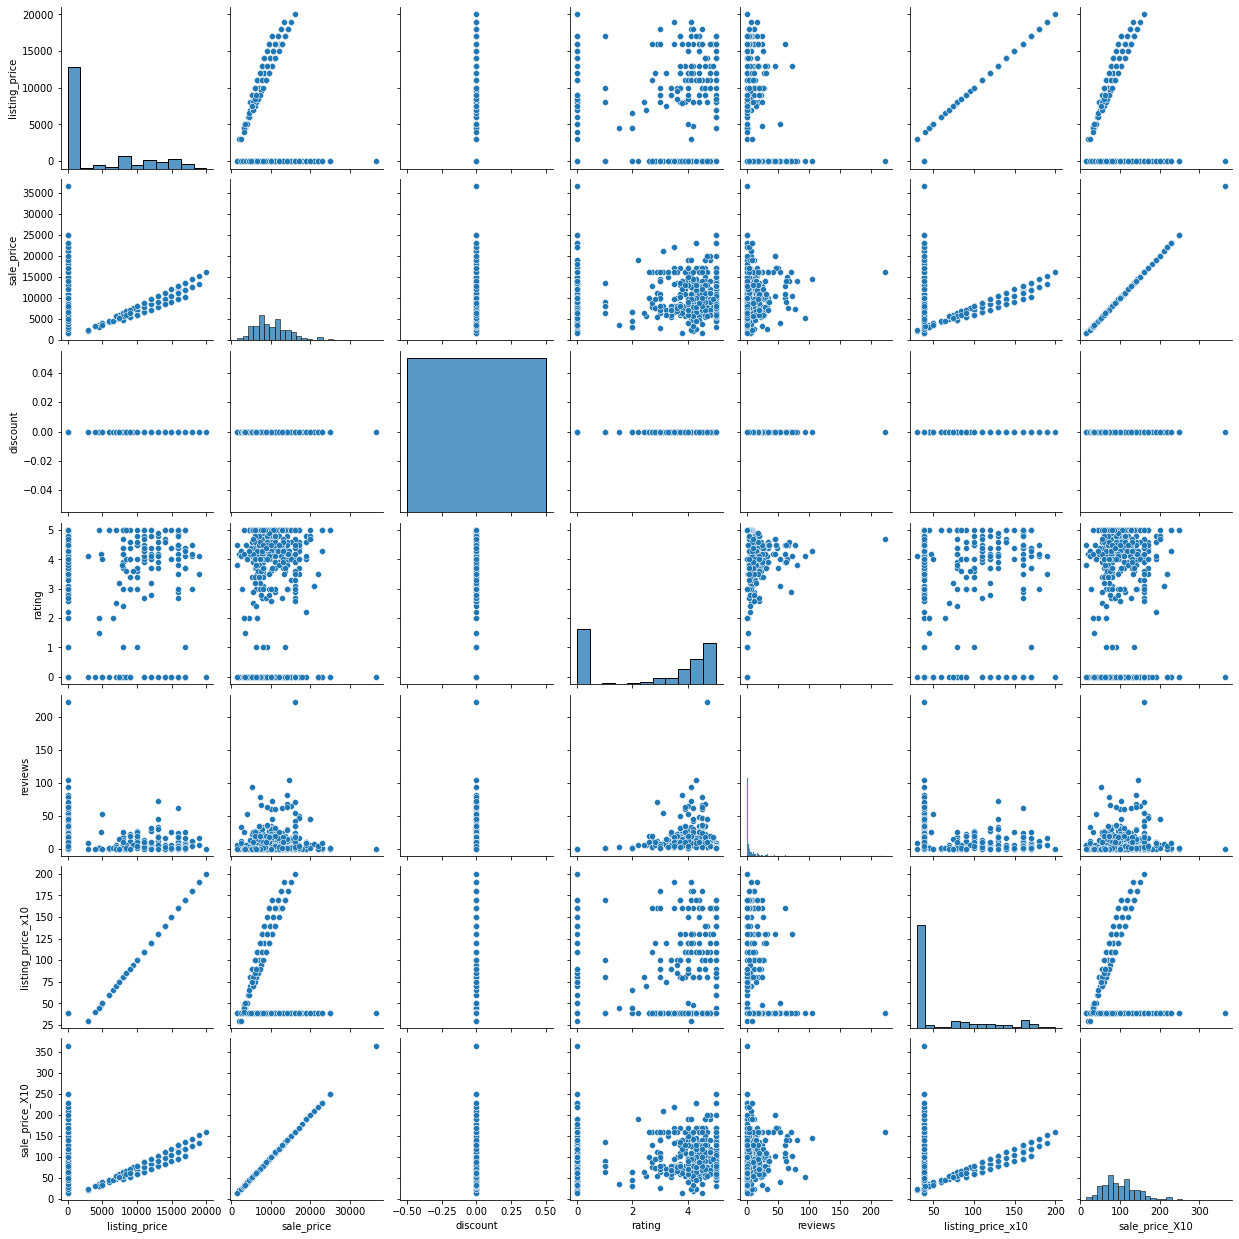

In [20]:
import seaborn as sns

# Select only the numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Create scatter plots using Seaborn
sns.pairplot(numeric_cols)

In [21]:
# filtering datasets removing 0's 
df_1 = df.loc[(df.listing_price != 0)]
df_2 = df.loc[(df.listing_price == 0)]

In [22]:
# checking datasets
df_1.describe()

,listing_price,sale_price,discount,rating,reviews,listing_price_x10,sale_price_X10
count,217.000000,217.000000,217.0,217.000000,217.000000,217.000000,217.000000
mean,11484.400922,8237.875576,0.0,2.948387,6.539171,114.844009,82.378756
std,3914.790107,2986.535009,0.0,2.006335,10.400747,39.147901,29.865350
min,2995.000000,2097.000000,0.0,0.000000,0.000000,29.950000,20.970000
25%,7995.000000,5997.000000,0.0,0.000000,0.000000,79.950000,59.970000
50%,10995.000000,7797.000000,0.0,4.000000,2.000000,109.950000,77.970000
75%,15995.000000,10497.000000,0.0,4.500000,8.000000,159.950000,104.970000
max,19995.000000,15997.000000,0.0,5.000000,72.000000,199.950000,159.970000


In [23]:
# checking datasets
df_2.describe()

,listing_price,sale_price,discount,rating,reviews,listing_price_x10,sale_price_X10
count,426.0,426.000000,426.0,426.000000,426.000000,426.00,426.000000
mean,0.0,11220.129108,0.0,2.626056,7.509390,38.76,112.201291
std,0.0,4819.610435,0.0,2.195997,18.162694,0.00,48.196104
min,0.0,1595.000000,0.0,0.000000,0.000000,38.76,15.950000
25%,0.0,7995.000000,0.0,0.000000,0.000000,38.76,79.950000
50%,0.0,9995.000000,0.0,3.700000,1.000000,38.76,99.950000
75%,0.0,13995.000000,0.0,4.700000,6.000000,38.76,139.950000
max,0.0,36500.000000,0.0,5.000000,223.000000,38.76,365.000000


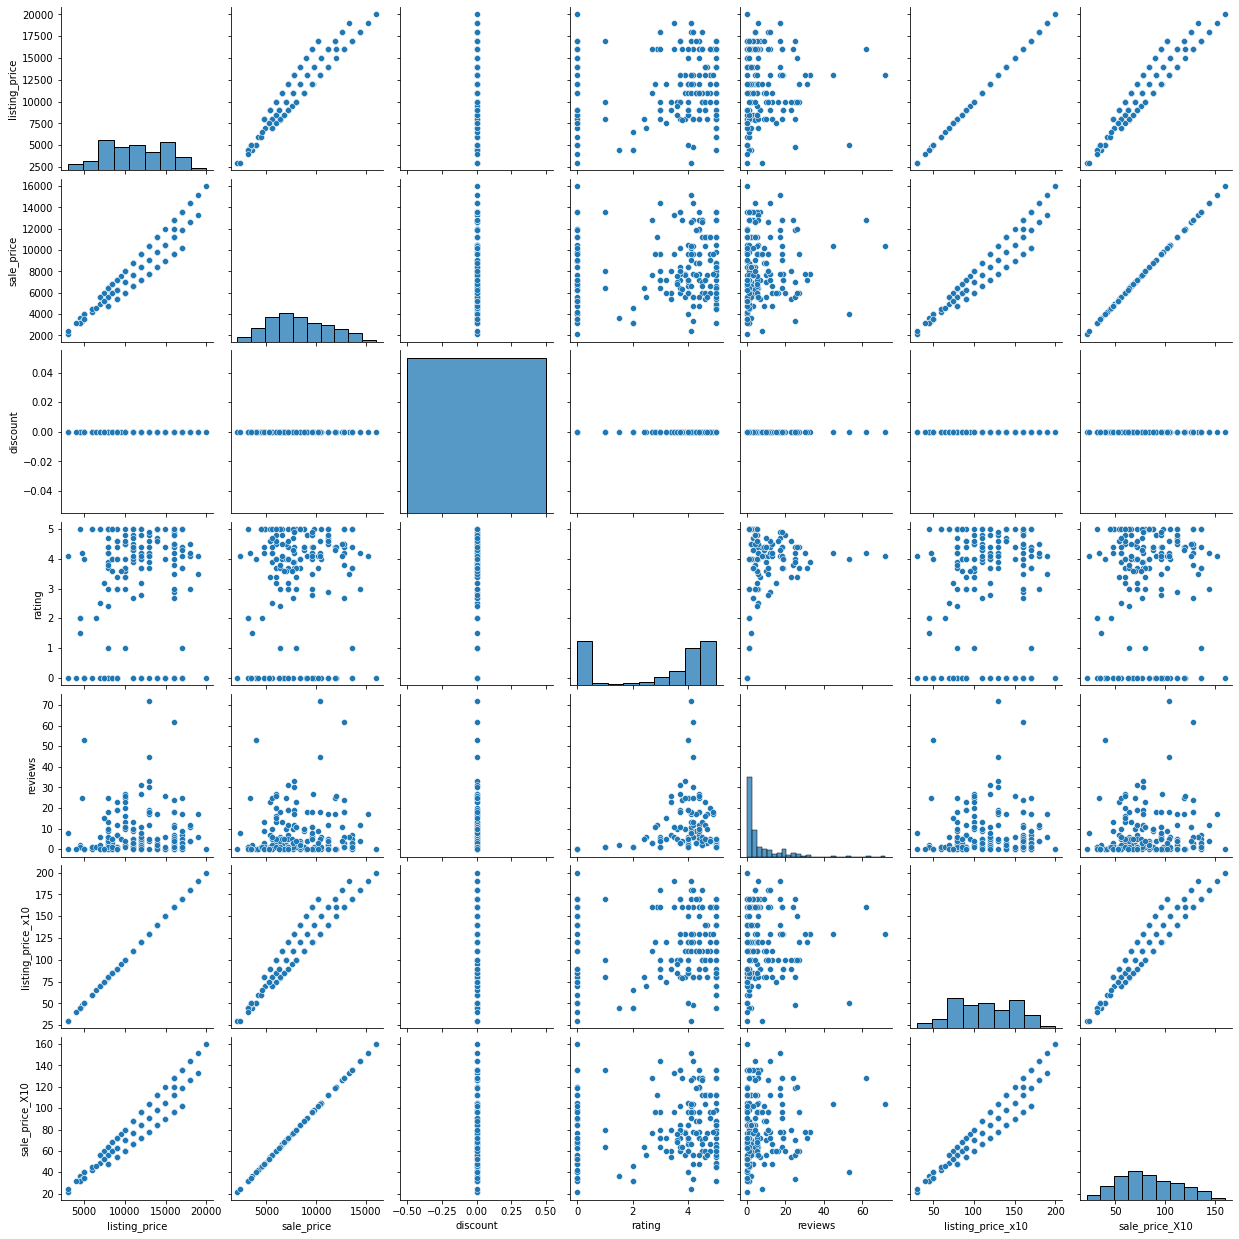

In [24]:
numeric_cols = df_1.select_dtypes(include=['float64', 'int64'])
numeric_cols_2 = df_2.select_dtypes(include=['float64', 'int64'])
# Create scatter plots using Seaborn
sns.pairplot(numeric_cols)

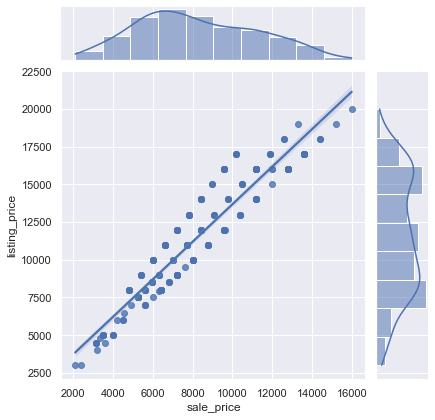

In [25]:
sns.set_theme(style="darkgrid")

sns.jointplot(data=df_1, x='sale_price', y='listing_price', kind='reg')


In [26]:
pip install scikit-learn

You should consider upgrading via the 'C:\Users\chima\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [27]:
# Perform label encoding on categorical feature
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_1['product_brand_enc'] = label_encoder.fit_transform(df_1['product_brand'])
df_2['product_brand_enc'] = label_encoder.fit_transform(df_2['product_brand'])

C:\Users\chima\AppData\Local\Temp\ipykernel_2920\90805239.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['product_brand_enc'] = label_encoder.fit_transform(df_1['product_brand'])
C:\Users\chima\AppData\Local\Temp\ipykernel_2920\90805239.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['product_brand_enc'] = label_encoder.fit_transform(df_2['product_brand'])


In [28]:
df_1.head()

,product_name,product_id,listing_price,sale_price,discount,brand,description,rating,reviews,images,listing_price_x10,sale_price_X10,product_brand,product_brand_enc
21,Nike SB Bruin High,923112-001,7995,5597,0,Nike,The first Nike SB shoe designed specifically f...,4.2,6,NaN,79.95,55.97,Nike SB,25
33,Nike Joyride Run FlyKnit,CI3707-100,15995,11997,0,Nike,The Nike Joyride Run Flyknit is designed to he...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",159.95,119.97,Nike Joy,17
56,Nike Air Max Tailwind 99,CQ6569-001,15995,11197,0,Nike,The Nike Air Max Tailwind 99 has a storied his...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",159.95,111.97,Nike Air,5
69,Nike Epic Phantom React A.I.R. Cody Hudson,CI1718-001,13995,8397,0,Nike,"Soft to the touch, the Nike Epic Phantom React...",5.0,2,"[""https://static.nike.com/a/images/t_PDP_1728_...",139.95,83.97,Nike Epi,12
75,Nike Air Max 270 React,AO4971-700,12995,7797,0,Nike,The bold silhouette of Nike Air lifts the Nike...,3.9,33,"[""https://static.nike.com/a/images/t_PDP_1728_...",129.95,77.97,Nike Air,5


In [29]:
numeric_cols = df_1.select_dtypes(include=['float64', 'int64', 'int32'])
numeric_cols_2 = df_2.select_dtypes(include=['float64', 'int64', 'int32'])
numeric_cols.head()

,listing_price,sale_price,discount,rating,reviews,listing_price_x10,sale_price_X10,product_brand_enc
21,7995,5597,0,4.2,6,79.95,55.97,25
33,15995,11997,0,0.0,0,159.95,119.97,17
56,15995,11197,0,0.0,0,159.95,111.97,5
69,13995,8397,0,5.0,2,139.95,83.97,12
75,12995,7797,0,3.9,33,129.95,77.97,5


C:\Users\chima\AppData\Local\Temp\ipykernel_2920\363346450.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_1.corr()


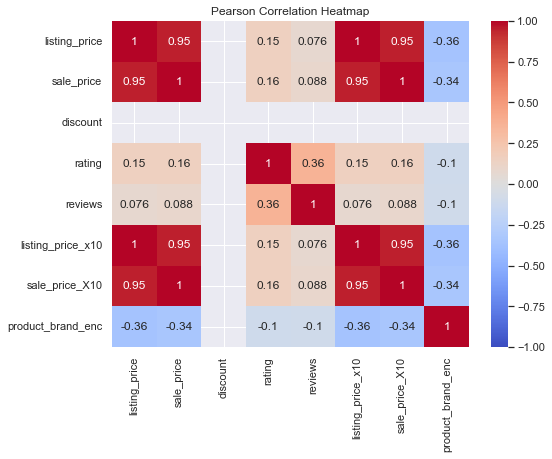

In [30]:
# Compute Pearson correlation coefficients
correlation_matrix = df_1.corr()

import matplotlib.pyplot as plt

# Create a heatmap using seaborn
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Heatmap')
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler


numeric_cols = numeric_cols.drop(['discount','listing_price_x10','sale_price_X10'], axis=1)
numeric_cols_2 = numeric_cols_2.drop(['discount','listing_price_x10','sale_price_X10'], axis=1)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_cols)
df_2_scaled = scaler.fit_transform(numeric_cols_2)

In [32]:
df_scaled = pd.DataFrame(df_scaled, columns = ['listing_price','sale_price','rating','reviews', 'product_brand_enc'])
df_2_scaled = pd.DataFrame(df_2_scaled, columns = ['listing_price','sale_price','rating','reviews', 'product_brand_enc'])
df_2_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   listing_price      426 non-null    float64
 1   sale_price         426 non-null    float64
 2   rating             426 non-null    float64
 3   reviews            426 non-null    float64
 4   product_brand_enc  426 non-null    float64
dtypes: float64(5)
memory usage: 16.8 KB


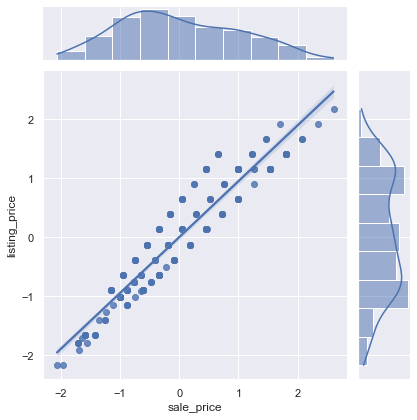

In [33]:
sns.jointplot(data=df_scaled, x='sale_price', y='listing_price', kind='reg')

In [34]:
from sklearn.linear_model import LinearRegression
# creating X and Y 
X = df_scaled.drop(['listing_price'], axis=1)
Y = df_scaled['listing_price']
print(X)
# Train the linear regression model
regression_model = LinearRegression()
regression_model.fit(X, Y)

     sale_price    rating   reviews  product_brand_enc
0     -0.886305  0.625273 -0.051959           0.985370
1      1.261601 -1.472937 -0.630175           0.225440
2      0.993113 -1.472937 -0.630175          -0.914455
3      0.053404  1.024932 -0.437436          -0.249516
4     -0.147962  0.475401  2.550010          -0.914455
..          ...       ...       ...                ...
212    0.187648  0.725188  0.333518          -1.199428
213    1.530089  1.024932 -0.533806          -1.389411
214   -1.591087 -1.472937 -0.630175           0.795387
215   -0.768842  1.024932 -0.533806           0.510414
216   -0.651378 -1.472937 -0.630175           0.700396

[217 rows x 4 columns]


LinearRegression()

In [35]:
df_2_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   listing_price      426 non-null    float64
 1   sale_price         426 non-null    float64
 2   rating             426 non-null    float64
 3   reviews            426 non-null    float64
 4   product_brand_enc  426 non-null    float64
dtypes: float64(5)
memory usage: 16.8 KB


In [36]:
# Make predictions on the test set
df_predict= numeric_cols_2.drop(['listing_price'], axis=1)
predictions = regression_model.predict(df_predict)

# Add predictions as a column to the test set
numeric_cols_2['Prediction'] = predictions

print(numeric_cols_2)

     listing_price  sale_price  rating  reviews  product_brand_enc  \
0                0        7495     0.0        0                  8   
1                0        7495     0.0        0                  8   
2                0        9995     0.0        0                  8   
3                0        9995     0.0        0                  8   
4                0        9995     0.0        0                  8   
..             ...         ...     ...      ...                ...   
632              0       15995     3.3        3                  0   
633              0       19995     4.7       45                 45   
635              0        6495     0.0        0                 43   
637              0       13995     3.0        1                 35   
641              0       16995     4.0        4                  8   

       Prediction  
0     7001.380633  
1     7001.380633  
2     9336.852811  
3     9336.852811  
4     9336.852811  
..            ...  
632  14942.324774  

In [37]:
df_2['listing_price'] = numeric_cols_2['Prediction']

C:\Users\chima\AppData\Local\Temp\ipykernel_2920\942294412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['listing_price'] = numeric_cols_2['Prediction']


In [38]:
df_final = df_1.append(df_2, ignore_index = True)

C:\Users\chima\AppData\Local\Temp\ipykernel_2920\3539077979.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_1.append(df_2, ignore_index = True)


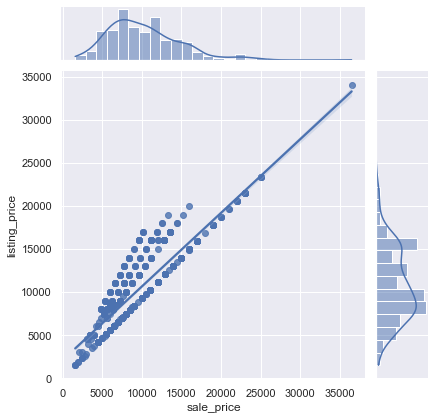

In [39]:
sns.jointplot(data=df_final, x='sale_price', y='listing_price', kind='reg')
